In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style

In [2]:
oracle = QuantumCircuit(3,name = 'oracle')
oracle.cz(0,2)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─┼─
      │ 
q_2: ─■─

In [3]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(3,3)
grover_circ.h([0,1,2])
grover_circ.append(oracle,[0,1,2])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│         │
q_1: ┤ H ├┤1 oracle ├
     ├───┤│         │
q_2: ┤ H ├┤2        ├
     └───┘└─────────┘
c: 3/════════════════

In [4]:
 job = execute(grover_circ,backend)
result = job.result()
sv = result.get_statevector()
np.around(sv,2)

array([ 0.35+0.j,  0.35+0.j,  0.35+0.j,  0.35+0.j,  0.35+0.j, -0.35+0.j,
        0.35+0.j, -0.35+0.j])

In [14]:
reflection = QuantumCircuit(3, name = 'reflection')
reflection.h([0,1,2])
reflection.z([0,1,2])
#reflection.z([1,2])
reflection.cz(0,1)
reflection.cz(1,2)
reflection.h([0,1,2])
#reflection.h([1,2])
reflection.to_gate()

Instruction(name='reflection', num_qubits=3, num_clbits=0, params=[])

In [15]:
reflection.draw()

┌───┐┌───┐   ┌───┐     
q_0: ┤ H ├┤ Z ├─■─┤ H ├─────
     ├───┤├───┤ │ └───┘┌───┐
q_1: ┤ H ├┤ Z ├─■───■──┤ H ├
     ├───┤├───┤     │  ├───┤
q_2: ┤ H ├┤ Z ├─────■──┤ H ├
     └───┘└───┘        └───┘

In [39]:
import math

backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(3,3)
print(grover_circ)
grover_circ.h([0,1])
#grover_circ.h([1,2])
grover_circ.ccx(0,1,2)
grover_circ.rx(math.pi/4, 2)
grover_circ.rz(math.pi, 2)
grover_circ.ry(math.pi, 2)



#statevec = do_job(grover_circ)
#statevec = do_job1(grover_circ)
#plot_bloch_multivector(statevec)
grover_circ.append(oracle,[0,1,2])
grover_circ.append(reflection,[0,1,2])
grover_circ.measure([0,1],[0,1])
grover_circ.measure([1,2],[1,2])
print(grover_circ)

     
q_0: 
     
q_1: 
     
q_2: 
     
c: 3/
     
     ┌───┐                                  ┌─────────┐┌─────────────┐┌─┐      »
q_0: ┤ H ├──■───────────────────────────────┤0        ├┤0            ├┤M├──────»
     ├───┤  │                               │         ││             │└╥┘┌─┐   »
q_1: ┤ H ├──■───────────────────────────────┤1 oracle ├┤1 reflection ├─╫─┤M├───»
     └───┘┌─┴─┐┌─────────┐┌───────┐┌───────┐│         ││             │ ║ └╥┘┌─┐»
q_2: ─────┤ X ├┤ Rx(π/4) ├┤ Rz(π) ├┤ Ry(π) ├┤2        ├┤2            ├─╫──╫─┤M├»
          └───┘└─────────┘└───────┘└───────┘└─────────┘└─────────────┘ ║  ║ └╥┘»
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«     ┌─┐
«q_1: ┤M├
«     └╥┘
«q_2: ─╫─
«      ║ 
«c: 3/═╩═
«      1 


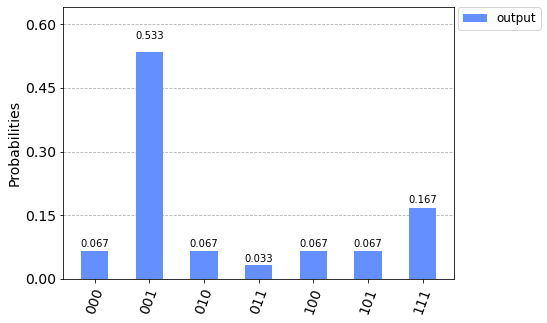

In [50]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style

job = execute(grover_circ, backend, shots = 30)
result = job.result()

#print(result)

counts = result.get_counts()
plot_histogram([counts], legend = ['output'])